In [7]:
# Assignment #1
# (LO 1)
#
# 1) By using google colab code to access your webcam, capture three different facial expressions of yourself.
#    A) Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values. (5 Marks)
#    B) Perform blurring of only faces in those images. (5 Marks)
#    C) Calculating the number of coins in an image using contours. (5 Marks)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/drive/MyDrive/Colab Notebooks/"

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo0.jpg


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo1.jpg


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo2.jpg


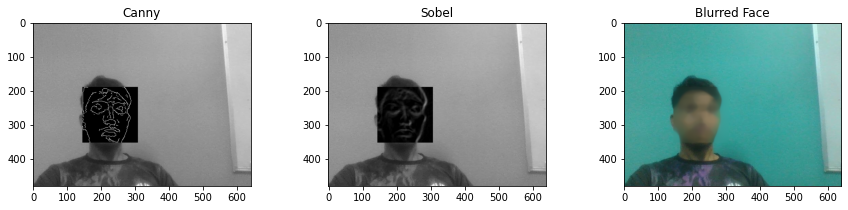

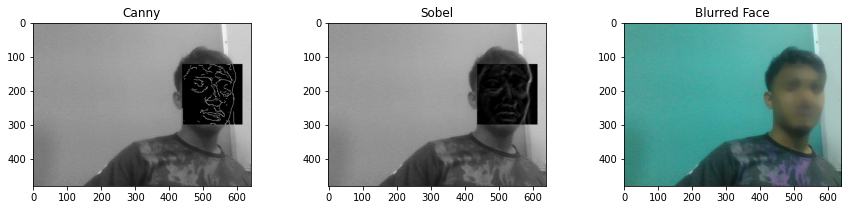

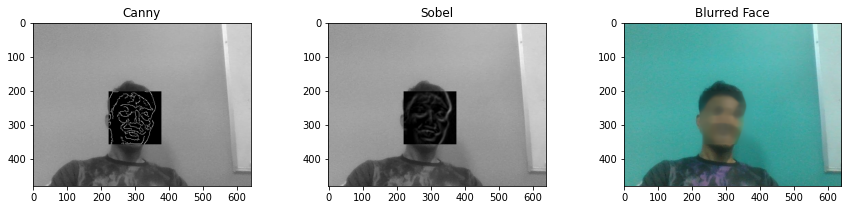

In [12]:
# Import Dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
import io
import html
import time

# Function to Display Image
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

# Function to Convert the JavaScript Object into an OpenCV Image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function to Convert OpenCV Rectangle Bounding Box Image into base64 byte String to be Overlayed on Video Stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade

  
  #faces = face_cascade.detectMultiScale(gray)
  ## draw face bounding box on image
  #for (x,y,w,h) in faces:
  #   img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  
  # save image
  cv2.imwrite(filename, img)
  return filename

for i in range(3):
  try:
    photofilename = 'photo' + str(i) + '.jpg'
    filename = take_photo(photofilename)
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    #display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

result1 = cv2.cvtColor(cv2.imread('photo0.jpg'),cv2.COLOR_BGR2RGB)
result2 = cv2.cvtColor(cv2.imread('photo1.jpg'),cv2.COLOR_BGR2RGB)
result3 = cv2.cvtColor(cv2.imread('photo2.jpg'),cv2.COLOR_BGR2RGB)

for i in range(3):
  imageToProcess  = 'photo' + str(i) + '.jpg'
  img = cv2.imread(imageToProcess)
  imgView = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  imgCanny = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  imgSobel = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  grayImage = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  imgBlur = cv2.GaussianBlur(grayImage,(7,7),5)

  faces = face_cascade.detectMultiScale(imgView)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
    #imgView = cv2.rectangle(imgView,(x,y),(x+w,y+h),(255,0,0),1)
    imgView[y:y+h,x:x+w] = cv2.medianBlur(imgView[y:y+h,x:x+w],35)
    
    # canny
    imgCanny[y:y+h,x:x+w] = cv2.Canny(imgBlur[y:y+h,x:x+w],1,30)

    # sobel
    sobelx = cv2.Sobel(imgBlur[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(imgBlur[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
    addsobel = sobelx + sobely
    imgSobel[y:y+addsobel.shape[0], x:x+addsobel.shape[1],] = addsobel
  
  plt.figure(figsize=(15,3))
  plt.subplot(131); plt.title("Canny"); plt.imshow(imgCanny, cmap="gray");
  plt.subplot(132); plt.title("Sobel"); plt.imshow(imgSobel, cmap="gray");
  plt.subplot(133); plt.title("Blurred Face"); plt.imshow(imgView, cmap="gray");
  plt.show()

Coins in the images: 5


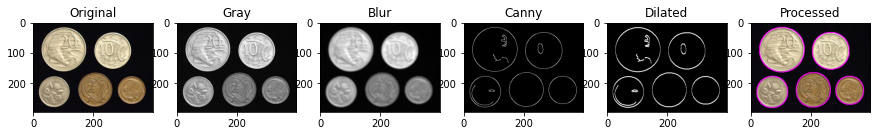

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "/content/gdrive/MyDrive/Colab Notebooks/"
image2 = cv2.imread(path+'coins2.jpg')
image3 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray');

blur = cv2.GaussianBlur(gray, (11,11), 0)
#plt.imshow(blur, cmap='gray')

canny = cv2.Canny(blur, 30, 150, 3)
#plt.imshow(canny, cmap='gray')

dilated = cv2.dilate(canny, (1,1), iterations = 2)
#plt.imshow(dilated, cmap='gray')

(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (255,0,255), 2)

print('Coins in the images:', len(cnt))

plt.figure(figsize=(15,3))
plt.subplot(161); plt.title("Original"); plt.imshow(image3)
plt.subplot(162); plt.title("Gray"); plt.imshow(gray, cmap='gray')
plt.subplot(163); plt.title("Blur"); plt.imshow(blur, cmap='gray')
plt.subplot(164); plt.title("Canny"); plt.imshow(canny, cmap='gray')
plt.subplot(165); plt.title("Dilated"); plt.imshow(dilated, cmap='gray')
plt.subplot(166); plt.title("Processed"); plt.imshow(rgb)
plt.show()